In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
#データCSVの読み込み
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['点数'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [3]:
#無作為抽出
np.random.choice([1, 2, 3], 3)

array([2, 1, 1])

In [4]:
#非復元抽出(復元抽出)
np.random.choice([1, 2, 3], 3, replace=False)

array([3, 1, 2])

In [5]:
#乱数シード(これから発生させる乱数の元となる数字を設定する)
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [6]:
#Aさんの行った無作為抽出はnp.random.seed(0)で乱数シードを0に指定した後に、scoresから
#サンプルサイズを20で復元抽出することで再現することができる。
#無作為抽出を行い、標本平均を計算する
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [7]:
#全生徒のデータから、Aさんが推測したい母平均も計算できる
scores.mean()

69.53

In [8]:
#無作為抽出は行うたびに結果が異なるため、得られる標本平均も毎回異なる。無作為抽出とその標本平均の計算を何回か行ってみる
for i in range(7):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}回目の無作為抽出で得た標本平均', sample.mean())

1回目の無作為抽出で得た標本平均 72.45
2回目の無作為抽出で得た標本平均 63.7
3回目の無作為抽出で得た標本平均 66.05
4回目の無作為抽出で得た標本平均 71.7
5回目の無作為抽出で得た標本平均 74.15
6回目の無作為抽出で得た標本平均 70.7
7回目の無作為抽出で得た標本平均 71.9


In [9]:
#いかさまサイコロ
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]
#確率変数の試行にnp.random.choice関数を使う
#引数pにpropを渡すことでそれぞれの確率を指定して、1回試行する
np.random.choice(dice, p=prob)

1

In [11]:
#上記の試行を100回行う
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 1, 5, 3, 6, 6, 3, 5, 5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6, 5, 6, 5,
       6, 5, 6, 5, 4, 5, 1, 4, 5, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 4, 6, 4,
       4, 6, 6, 5, 2, 6, 5, 6, 3, 6, 3, 5, 2, 6, 6, 5, 4, 2, 5, 4, 6, 6,
       6, 6, 1, 4, 6, 3, 5, 2, 3, 1, 6, 3, 4, 6, 5, 1, 3, 5, 5, 3, 6, 5,
       5, 5, 6, 4, 4, 3, 3, 6, 6, 5, 3, 3])

In [12]:
#度数分布表を作成する
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'度数':freq, '相対度数':freq / num_trial}, index = pd.Index(np.arange(1, 7), name='出目'))

,度数,相対度数
出目,,
1,5,0.05
2,5,0.05
3,14,0.14
4,17,0.17
5,30,0.30
6,29,0.29


/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 30446 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30456 missing from current font.
 

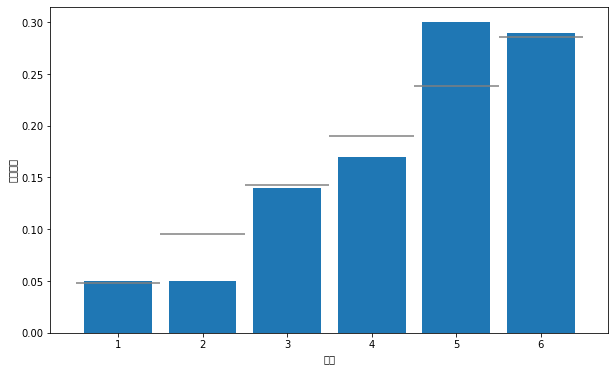

In [13]:
#度数分布によって出目や回数の割合が判明したので、実際の確率分布とともにヒストグラムも図示してみる
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
#真の確率分布を横線で表示
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
#棒グラフの[1.5, 2.5, …, 6.5]の場所に目盛りを付ける
ax.set_xticks(np.linspace(1.5, 6.5, 6))
#目盛りの値は[1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

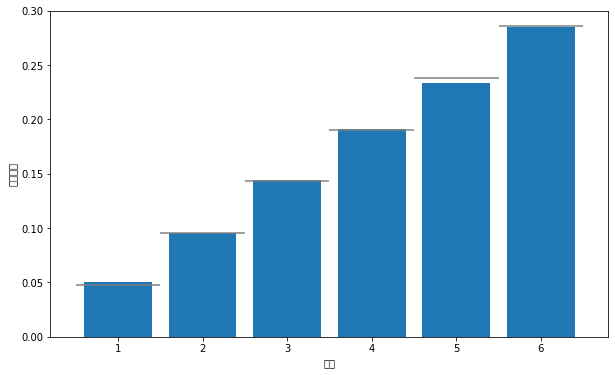

In [14]:
#試行回数を10000回にしたときのヒストグラム
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0, flags=flags)


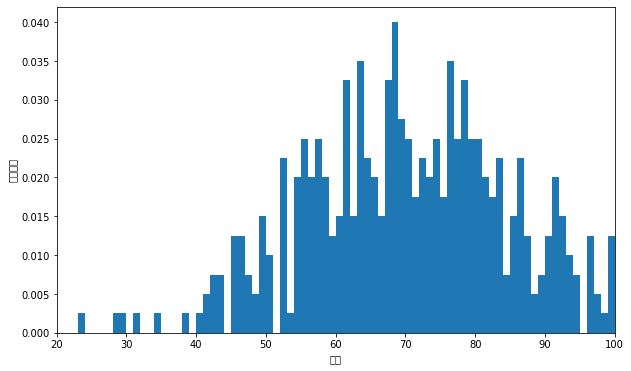

In [15]:
#推測統計による確率
#階級幅を1点にしてヒストグラムを図示してみる
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

In [16]:
#1回試行してみる
np.random.choice(scores)

76

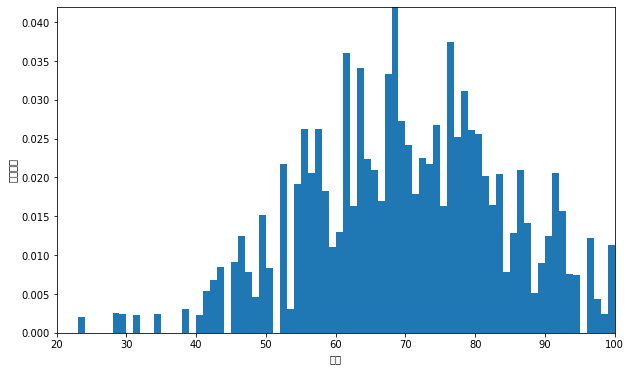

In [17]:
#無作為抽出においても標本のサンプルサイズを増やしていくと、標本データの相対度数は実際の確率分布に近づく
#無作為抽出によってサンプルサイズ10000の標本を抽出して、その結果をヒストグラムに図示してみる
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()

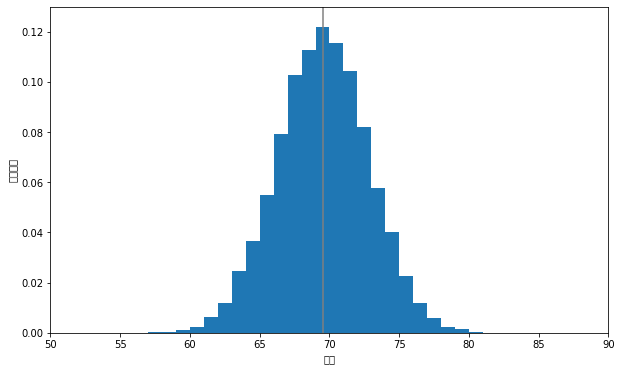

In [19]:
#標本平均について、標品ひとつひとつが確率変数であるので、それらの平均として計算される標本平均もまた確率変数となる
#無作為抽出により、サンプルサイズ20の標本を抽出して標本平均を計算するという作業を10000回行う
#その結果をヒストグラムに図示することで、標本平均の分布を見る
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
#母平均を縦線で表示
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('点数')
ax.set_ylabel('相対度数')
plt.show()